In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Je commence par ouvrir mes données

In [2]:
pokemon_Data = pd.read_csv("/home/theodubois40td/pokemon/Pokemon.csv")

J'affiche mon tableau (uniquement mes 20 premières lignes)

In [4]:
pokemon_Data.head(20)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


Je demande d'afficher le nombre de lignes et de colonnes

In [5]:
pokemon_Data.shape

(800, 13)

Je demande d'afficher les valeurs types de statistiques (j'aurais dû enlever la colonne "#")

In [6]:
pokemon_Data.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


Un graphique qui donne le nombre de Types 1

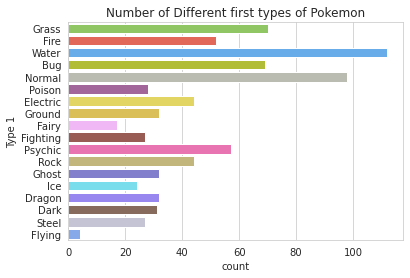

In [7]:
sns.set_style("whitegrid")
with sns.color_palette(["#8ED752", "#F95643", "#53AFFE", "#C3D221", "#BBBDAF","#AD5CA2", "#F8E64E", "#F0CA42", "#F9AEFE", "#A35449","#FB61B4", "#CDBD72", "#7673DA", "#66EBFF", "#8B76FF","#8E6856", "#C3C1D7", "#75A4F9"]):
    sns.countplot(y=pokemon_Data['Type 1'], data=pokemon_Data)
    plt.title("Number of Different first types of Pokemon")
    plt.show()

Un graphique circulaire qui donne le nombre de Types 2 (J'ai ajouter deux codes de taille sinon la légende amputée sur le titre)

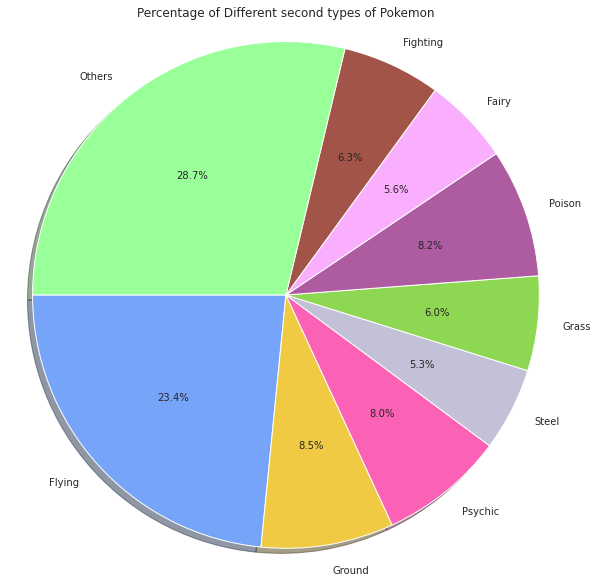

In [8]:
labels = 'Flying', 'Ground', 'Psychic', 'Steel', 'Grass', 'Poison', 'Fairy', 'Fighting', 'Others'
sizes = [97, 35, 33, 22, 25, 34, 23, 26, 119]
colors = ["#75A4F9", "#F0CA42", "#FB61B4", "#C3C1D7", "#8ED752", "#AD5CA2","#F9AEFE","#A35449",'#99ff99']
explode = (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Percentage of Different second types of Pokemon")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

Je définis "plt_variation", ensuite je remplace "stat" par une colonne de statistique(Attack, Speed, ...). J'ai ajouté un code de "ylim" car pour la stat hp on ne voyait pas le max du type normal.

In [9]:
def plt_variation(pokemon_Data, stat) :
    sns.set_style("whitegrid")
    with sns.color_palette(["#C3D221", "#8E6856", "#8B76FF", "#F8E64E", "#F9AEFE","#A35449", "#F95643", "#75A4F9", "#7673DA", "#8ED752", "#F0CA42", "#66EBFF", "#BBBDAF",  "#AD5CA2", "#FB61B4", "#CDBD72", "#C3C1D7", "#53AFFE"]):
        hp_data = pokemon_Data[['Name','Type 1', stat]]
        hp_data = hp_data.pivot_table(values=stat, index=['Name'], columns=['Type 1'])
        f, ax = plt.subplots(figsize=(18, 6))
        sns.violinplot(data=hp_data, bw=.2, cut=1, linewidth=1)
        ax.set(ylim=(0, 280))
        ax.set_title("{} of Different Types of Pokemon".format(stat))
        sns.despine(left=True, bottom=True)

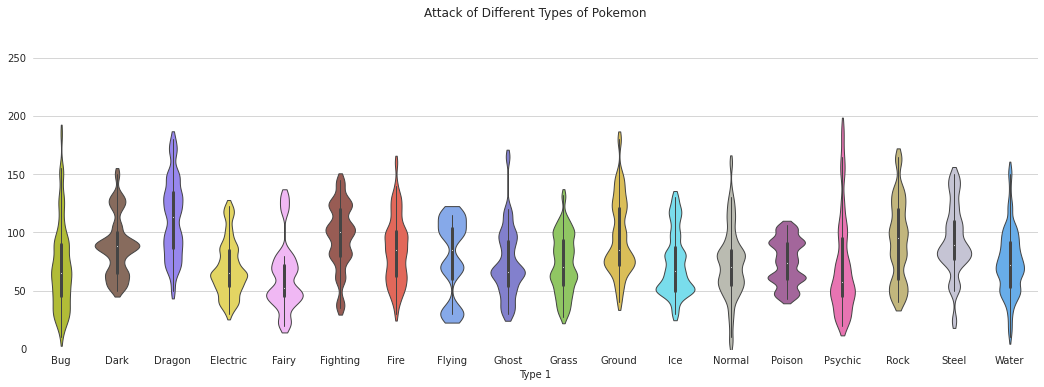

In [10]:
plt_variation(pokemon_Data, 'Attack')

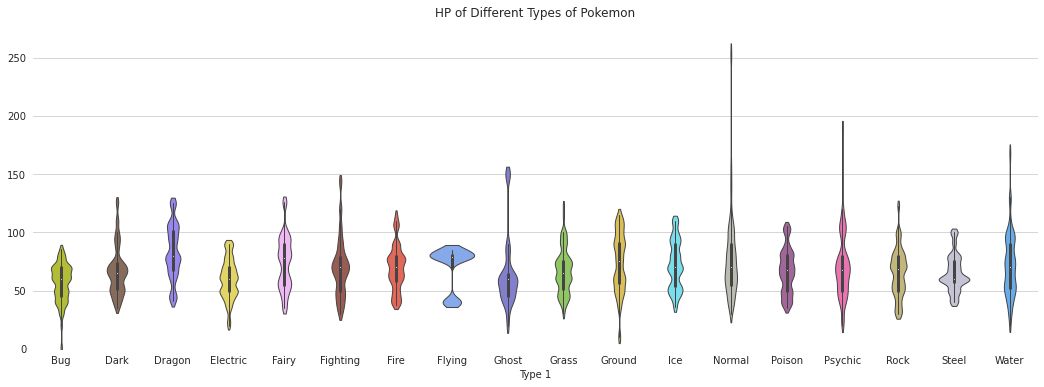

In [11]:
plt_variation(pokemon_Data, 'HP')

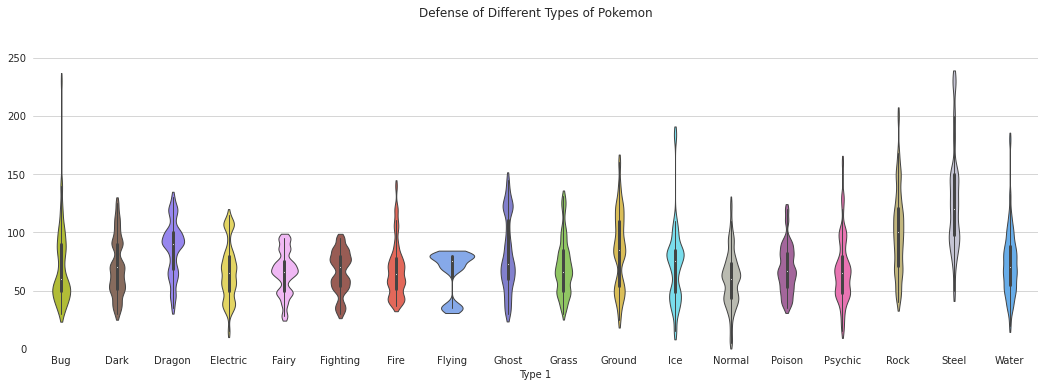

In [12]:
plt_variation(pokemon_Data, 'Defense')

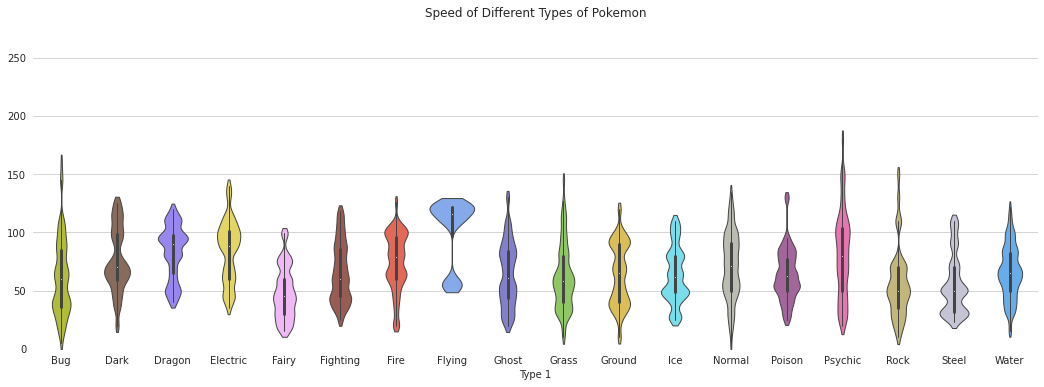

In [13]:
plt_variation(pokemon_Data, 'Speed')

In [14]:
pokemon = pokemon_Data.drop(['#', 'Total', 'Legendary', 'Generation'], axis = 1)
pkmn = pd.melt(pokemon, id_vars=["Name", "Type 1", "Type 2"], var_name="Stat")

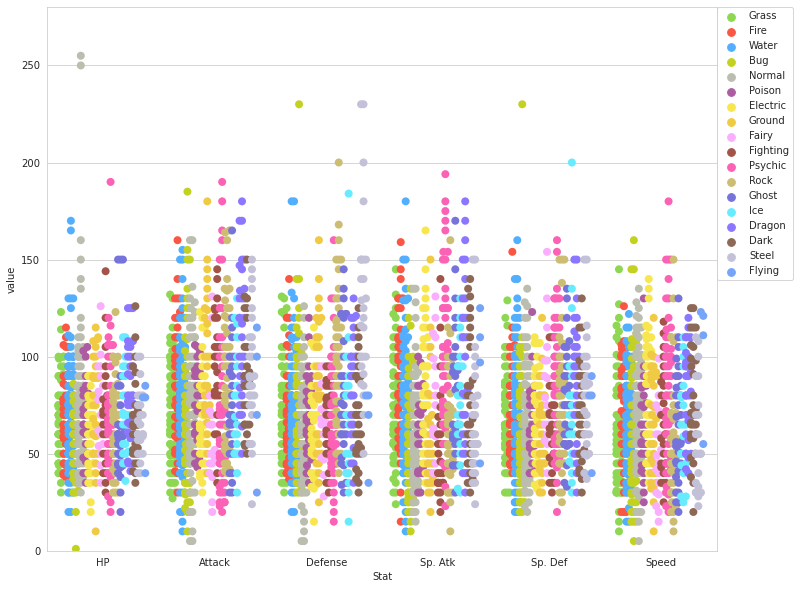

In [15]:
sns.set_style("whitegrid")
with sns.color_palette(["#8ED752", "#F95643", "#53AFFE", "#C3D221", "#BBBDAF","#AD5CA2", "#F8E64E", "#F0CA42", "#F9AEFE", "#A35449","#FB61B4", "#CDBD72", "#7673DA", "#66EBFF", "#8B76FF","#8E6856", "#C3C1D7", "#75A4F9"]):
    plt.figure(figsize=(12,10))
    plt.ylim(0, 280)
    sns.swarmplot(x="Stat", y="value", data=pkmn, hue="Type 1", dodge=True, size=8)
    plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

Un graphique circulair 
e montrant le top 10 des meilleurs pokémons.

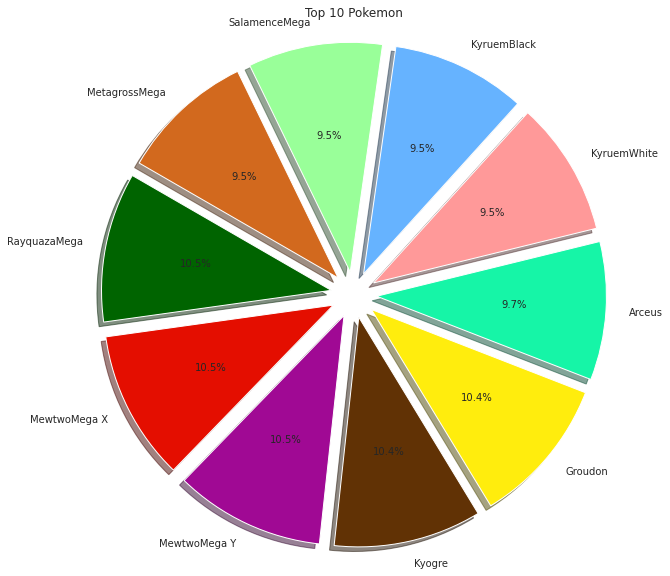

In [16]:
labels = 'RayquazaMega', 'MewtwoMega X', 'MewtwoMega Y', 'Kyogre', 'Groudon', 'Arceus', 'KyruemWhite', 'KyruemBlack', 'SalamenceMega', 'MetagrossMega'
sizes = [780, 780, 780, 770, 770, 720, 700, 700, 700, 700]
colors = ['#006400', '#E40E00', '#A00994', '#613205', '#FFED0D', '#16F5A7','#ff9999','#66b3ff','#99ff99', 'chocolate']
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=150)
plt.axis('equal')
plt.title("Top 10 Pokemon")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

In [17]:
Legendary = pokemon_Data[pokemon_Data['Legendary']==True]

Un graphique boxplot montrant sur les statistiques des pokémons légendaires uniquement.

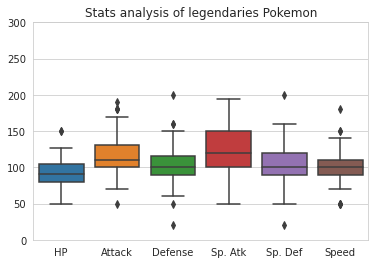

In [18]:
a = Legendary.drop(['#', 'Total', 'Legendary', 'Generation'], axis=1)
sns.boxplot(data=a)
plt.ylim(0,300) 
plt.title("Stats analysis of legendaries Pokemon")
plt.show()

Un graphique boxplot pour montrer la meilleure génération.

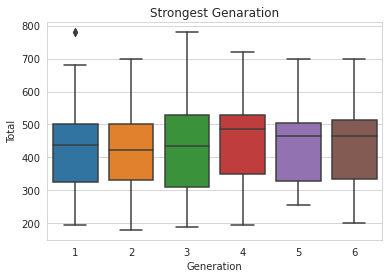

In [19]:
plt.title('Strongest Genaration')
sns.boxplot(x = "Generation", y = "Total",data = pokemon_Data)
plt.show()

Ici des histogrammes sur les différentes statistiques.

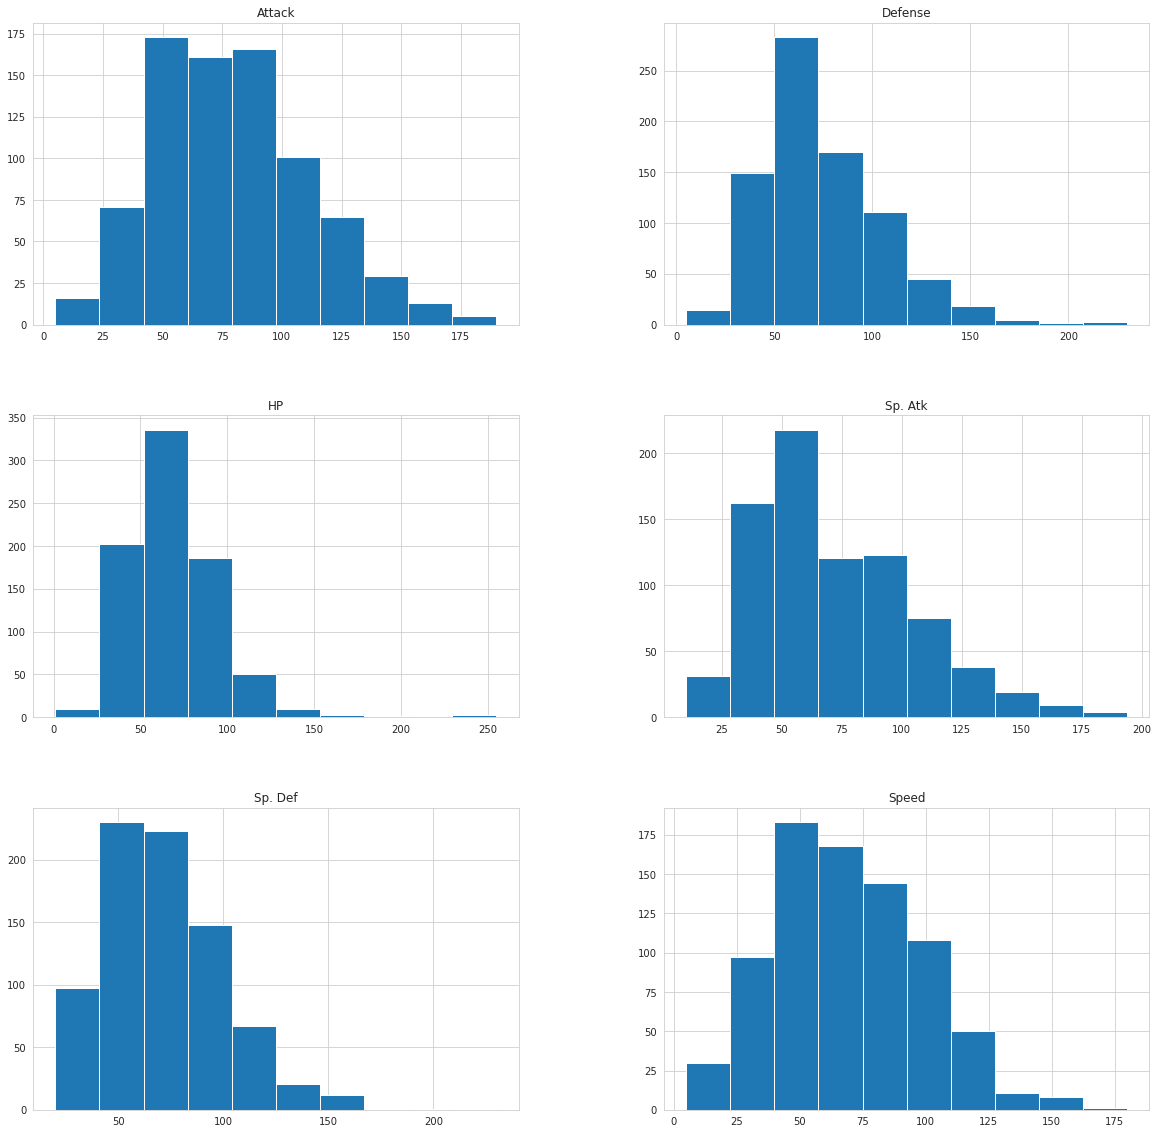

In [20]:
z = pokemon_Data.drop(['#', 'Total', 'Legendary', 'Generation'], axis=1)
x=z.hist(figsize = (20,20))